### Customer Churn Analysis
#### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.


Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.


Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 


You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Telecom_customer_churn1.csv')
pd.options.display.max_columns=None
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.isnull().sum().any()

False

We see that we do not have any Null Values in the dataset

In [4]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

We see that customerID could be dropped as it would not effect our Model

In [5]:
df.drop('customerID',axis=1,inplace=True)

In [6]:
for i in df.columns:
    print(i,'=',df[i].unique())

gender = ['Female' 'Male']
SeniorCitizen = [0 1]
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
tenure = [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService = ['No' 'Yes']
MultipleLines = ['No phone service' 'No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes' 'No internet service']
OnlineBackup = ['Yes' 'No' 'No internet service']
DeviceProtection = ['No' 'Yes' 'No internet service']
TechSupport = ['No' 'Yes' 'No internet service']
StreamingTV = ['No' 'Yes' 'No internet service']
StreamingMovies = ['No' 'Yes' 'No internet service']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges = [29.85 56.95 53.85 ... 63.1  44.2

We see that there are 3 columns that are numeric type and rest are object type

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We see that 'TotalCharges' should be float but is object type, lets examine further.

In [8]:
tc = df['TotalCharges'].unique()
tc.sort()
print(tc)

[' ' '100.2' '100.25' ... '999.45' '999.8' '999.9']


We see that there are sum values that are ' ' in TotalCharges

In [9]:
blanks = df[df['TotalCharges']==' ']
blanks

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


##### We see that there are quite a few rows that are ' ' in TotalCharges

We also see that total charges = Mothly charges * Tenure....and the ' ' values in total charges are the once with tenure 0, hence we could replace them with 0.

In [10]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',0)

In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [13]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

We see that there are no Null values in the dataset anymore.

For the ease of understanding lets convert SeniorCitizen into no and yes rather than 0 and 1.

In [14]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace(0,'No')
df['SeniorCitizen'] = df['SeniorCitizen'].replace(1,'Yes')

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [16]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [17]:
cat_columns = ['gender','Partner','Dependents','PhoneService','SeniorCitizen','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

In [18]:
non_cat = ['tenure', 'MonthlyCharges', 'TotalCharges']

### Vizualization

gender  :
Mode =  0    Male
dtype: object

Male      3555
Female    3488
Name: gender, dtype: int64


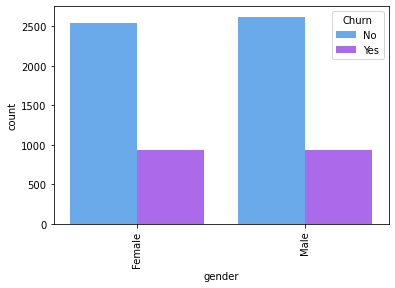


****************************************************************************************************
Partner  :
Mode =  0    No
dtype: object

No     3641
Yes    3402
Name: Partner, dtype: int64


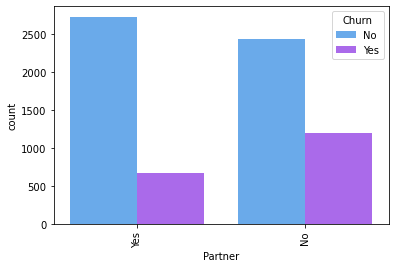


****************************************************************************************************
Dependents  :
Mode =  0    No
dtype: object

No     4933
Yes    2110
Name: Dependents, dtype: int64


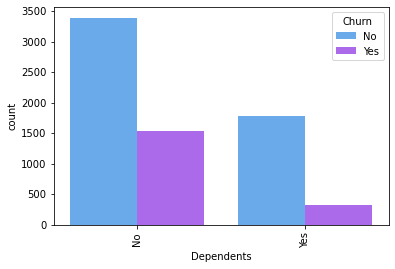


****************************************************************************************************
PhoneService  :
Mode =  0    Yes
dtype: object

Yes    6361
No      682
Name: PhoneService, dtype: int64


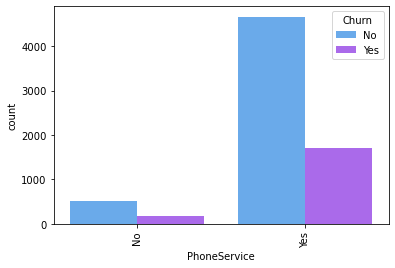


****************************************************************************************************
SeniorCitizen  :
Mode =  0    No
dtype: object

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64


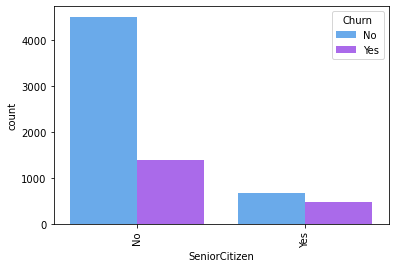


****************************************************************************************************
MultipleLines  :
Mode =  0    No
dtype: object

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


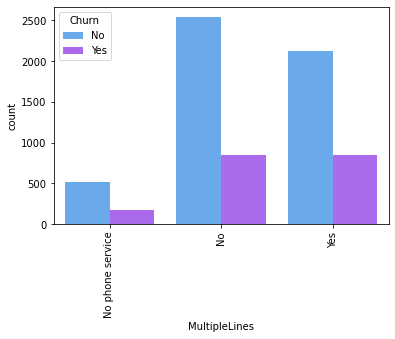


****************************************************************************************************
InternetService  :
Mode =  0    Fiber optic
dtype: object

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


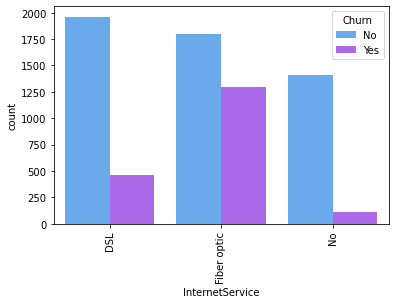


****************************************************************************************************
OnlineSecurity  :
Mode =  0    No
dtype: object

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


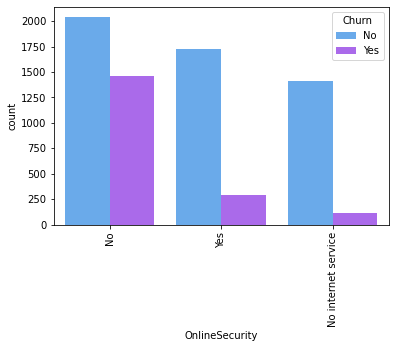


****************************************************************************************************
OnlineBackup  :
Mode =  0    No
dtype: object

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


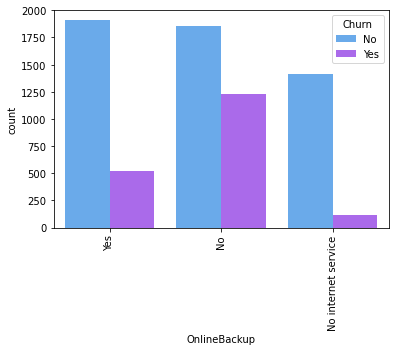


****************************************************************************************************
DeviceProtection  :
Mode =  0    No
dtype: object

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


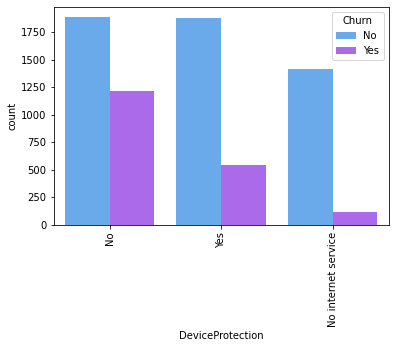


****************************************************************************************************
TechSupport  :
Mode =  0    No
dtype: object

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


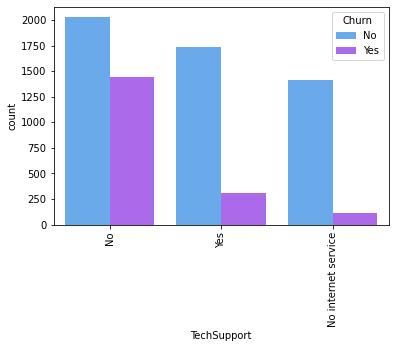


****************************************************************************************************
StreamingTV  :
Mode =  0    No
dtype: object

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


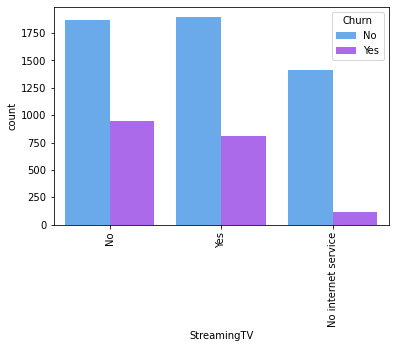


****************************************************************************************************
StreamingMovies  :
Mode =  0    No
dtype: object

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


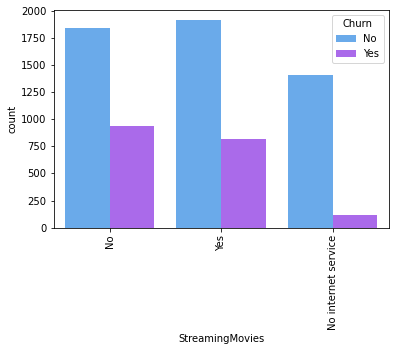


****************************************************************************************************
Contract  :
Mode =  0    Month-to-month
dtype: object

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


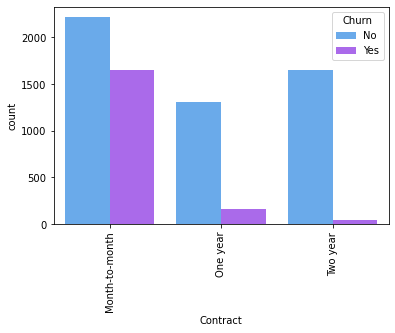


****************************************************************************************************
PaperlessBilling  :
Mode =  0    Yes
dtype: object

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


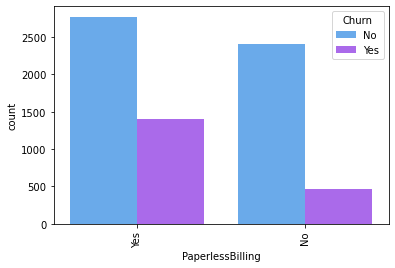


****************************************************************************************************
PaymentMethod  :
Mode =  0    Electronic check
dtype: object

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


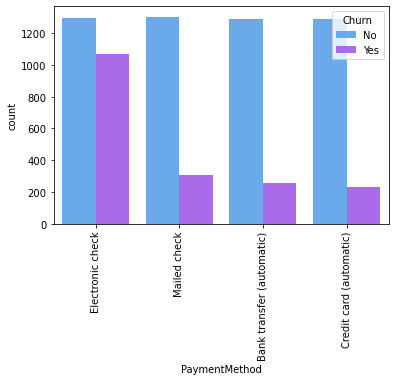


****************************************************************************************************
Churn  :
Mode =  0    No
dtype: object

No     5174
Yes    1869
Name: Churn, dtype: int64


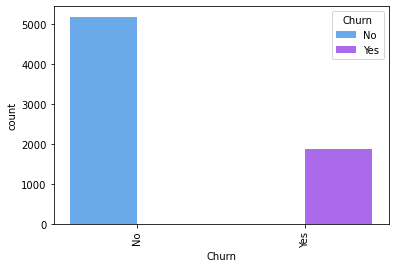


****************************************************************************************************


In [19]:
for i in cat_columns:
    print(i,' :')
    print('Mode = ',df[i].mode())
    print()
    print(df[i].value_counts())
    sns.countplot(df[i],palette='cool',hue=df['Churn'])
    plt.xticks(rotation=90)
    plt.show()
    print()
    print('*'*100)

### Observations :
    - We see that we have almost equal number of male and female.
    
    
    - We have a slightly higher count for customers without partners.
        - Customers without partner have higher churn rate.
        
        
    - Majority of the customers have no dependends on them.
        - Customers without Dependents have higher churn rate.
        
        
    - We have about 11% customers with no phone services.
    
    
    - Majority of the customer consist of younger customers.
        -  Senior Citizens have higher churn rate.
        
        
    - We have about 48% customers with who do not have Multiple Line connection, about 42% who have multiple connections and about 10% with no connection.
    
    
    - In-Terms of Internet services we see we have 21% customers how do not have any connection, about 44% have Fiber optic connection and 34% still use DSL.
        - Customers with Internet connection have higher Churn Rate off which Fiber otics customer have a very high churn rate.
    
    
    - In-Terms of Online Security about 49% have not chosen online security, only 29% have opted for online security and 21% have no internet services with the telecom provider.
        - Majority of the customers who have no online security tend to churn the most.
    
    
    - In-Terms of OnlineBackup about 44% have no OnlineBackup, about 34% have OnlineBackup and 21% have no internet services with the telecom provider.
        - Majority of the customers who have no OnlineBackup tend to churn the most.
        
        
    - In-Terms of DeviceProtection about 44% have no device protection, 34% have Device Protection and 21% have no internet services with the telecom provider.
        - Majority of the customers who have no DeviceProtection tend to churn the most.
    
    
    - In-Terms of TechSupport about 49% have not opted for TechSupport, about 29% have opted for Tech support and 21% have no internet services with the telecom provider.
        - Majority of the customers who have no TechSupport tend to churn the most.
        
        
    - In-Terms of StreamingTV about 39% have not opted for StreamingTV, about 38% have opted for StreamingTV and 21% have no internet services with the telecom provider.
    
    
    - In-Terms of StreamingMovies about 40% have not opted for StreamingMovies, about 39% have opted for StreamingMovies and 21% have no internet services with the telecom provider.
    
    
    - We see 55% of customers prefer Month-to-month, about 24% are on 2 year contract followed by 20% on a yearly contract.
        - Majority of the customers who are on Month-to-month tend to churn the most.
    
    
    - We see majority of the customers prefer paperless billing.
    
    
    - We see 34% people prefer Electronic check, 23% prefer Mailed check, 22% prefer Bank transfer (automatic) and 22% Cred Card.
        - Majority of the customers who prefer Electronic check tend to churn the most.
        
        
    - We see 73% of customers consist of non churned customers and 27% churned. The Data set is imbalance and will have to be balanced.

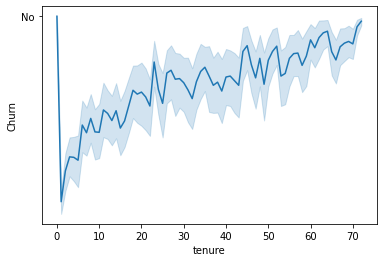

In [20]:
sns.lineplot(x = df['tenure'],y=df['Churn'])
plt.show()

We see as the tenure increases the chances of churn go on decreasing.

Majority of the customers pay monthly charges between 30-45.

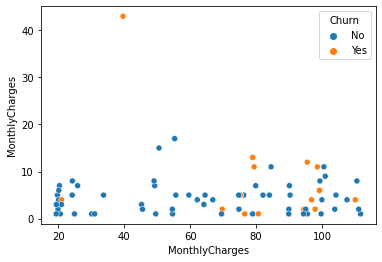

In [21]:
sns.scatterplot(x = df['MonthlyCharges'],y=df['MonthlyCharges'].value_counts(),hue=df['Churn'])
plt.show()

We see that majority of the customers who tend to churn pay higher Monthly charges.

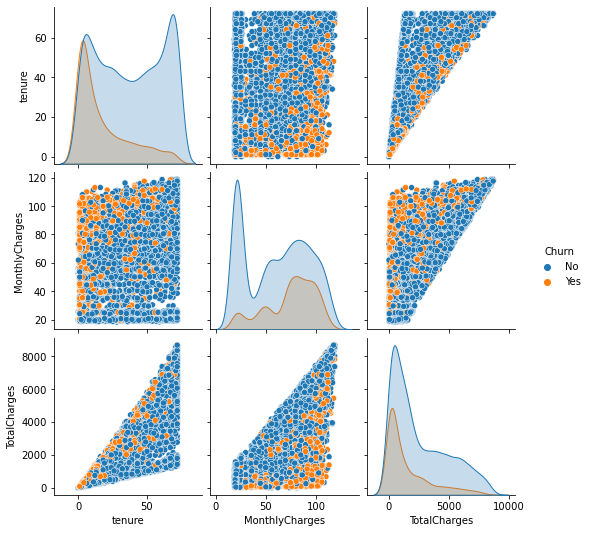

In [22]:
sns.pairplot(df,diag_kind='kde',hue='Churn')
plt.show()

### Checking Skewness

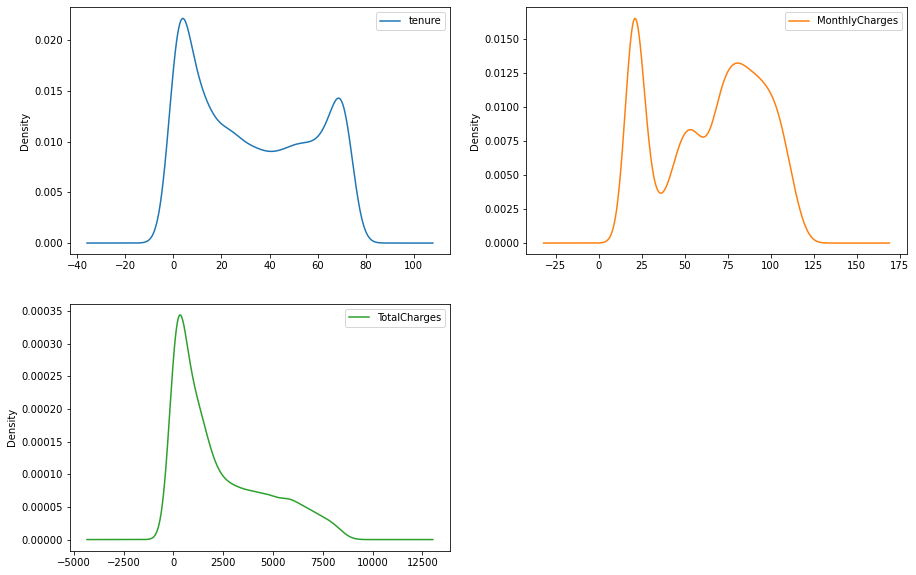

In [23]:
df.plot(kind='density',subplots=True,layout =(2,2),figsize=(15,10),sharex=False)
plt.show()

In [24]:
df.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64

Setting the skewness threshold to +/- 0.5, we see Total charges having higher value than threshold.

### Checking Outliers

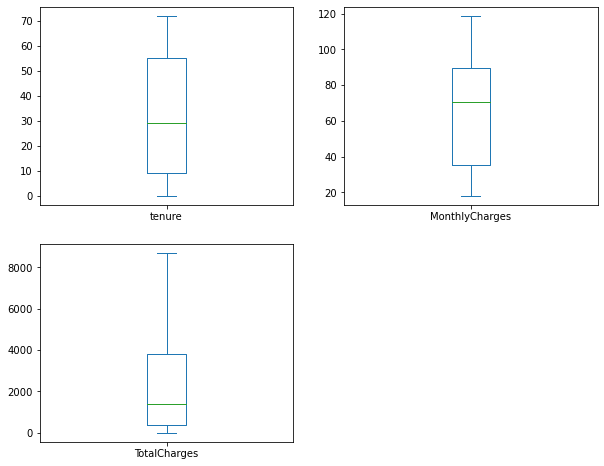

In [25]:
df.plot(kind='box',subplots=True,layout=(2,2),figsize=(10,8),sharex=True)
plt.show()

We do not find any outliers.

### Encoding Object type Columns

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
cat_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'SeniorCitizen',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [28]:
for i in cat_columns:
    df[i] = le.fit_transform(df[i])

In [29]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


### Checking Correlation

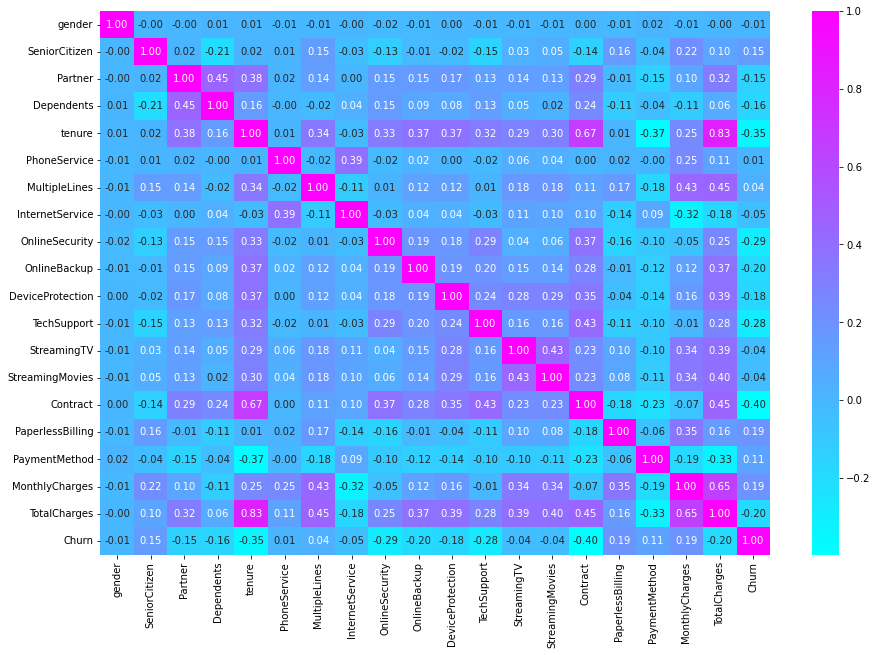

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='cool')
plt.show()

In [31]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000080,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103006,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317504,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062078,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826178,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113214,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452577,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175755,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253224,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.374410,-0.195525


We see both negitive an positive correlations with the target varriable

### Splitting the dataset into x & y

In [32]:
x = df.drop('Churn',axis=1)
x.shape

(7043, 19)

In [33]:
y = df['Churn']
y.shape

(7043,)

### Normalizing using Power_Transform

In [34]:
from sklearn.preprocessing import power_transform

In [35]:
X = power_transform(x)
X = pd.DataFrame(X,columns=x.columns)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.644343,-3.054010,0.334585,-1.252568,-0.977199,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,-1.158541,-1.792996
1,0.990532,-0.439916,-0.966622,-0.654012,0.297205,0.327438,-1.015015,-1.252568,1.258702,-1.078800,1.163539,-0.983227,-1.151526,-1.158239,0.790424,-1.205113,1.318899,-0.239492,0.254809
2,0.990532,-0.439916,-0.966622,-0.654012,-1.495444,0.327438,-1.015015,-1.252568,1.258702,1.161936,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,-0.342665,-1.375173
3,0.990532,-0.439916,-0.966622,-0.654012,0.646327,-3.054010,0.334585,-1.252568,1.258702,-1.078800,1.163539,1.252625,-1.151526,-1.158239,0.790424,-1.205113,-1.489837,-0.731079,0.233807
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.495444,0.327438,-1.015015,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,0.213545,-1.239490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.078084,0.327438,1.081357,-1.252568,1.258702,-1.078800,1.163539,1.252625,1.099560,1.094066,0.790424,0.829798,1.318899,0.671510,0.297072
7039,-1.009559,-0.439916,1.034530,1.529024,1.342198,0.327438,1.081357,0.290254,-0.977199,1.161936,1.163539,-0.983227,1.099560,1.094066,0.790424,0.829798,-0.522116,1.260981,1.567851
7040,-1.009559,-0.439916,1.034530,1.529024,-0.725121,-3.054010,0.334585,-1.252568,1.258702,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,0.409685,-1.167241,-0.852764
7041,0.990532,2.273159,1.034530,-0.654012,-1.265130,0.327438,1.081357,0.290254,-0.977199,-1.078800,-1.077012,-0.983227,-1.151526,-1.158239,-0.888524,0.829798,1.318899,0.334312,-0.915332


In [36]:
for i in non_cat:
    print(i,df[i].skew())

tenure 0.2395397495619829
MonthlyCharges -0.22052443394398033
TotalCharges 0.963234654832277


### Checking VIF

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['Features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i)for i in range(dataset.shape[1])]
    return vif.sort_values(by='VIF_Values',ascending=False)

In [39]:
calculate_vif(X)

,Features,VIF_Values
18,TotalCharges,57.924212
4,tenure,41.798629
17,MonthlyCharges,11.768118
14,Contract,2.472362
7,InternetService,1.857736
5,PhoneService,1.618322
2,Partner,1.458219
12,StreamingTV,1.427006
13,StreamingMovies,1.426958
6,MultipleLines,1.398864


We see a high vif for TotalCharges, which is a product of tenure and MonthlyCharges.In this case we could drop TotalCharges

In [40]:
X.drop('TotalCharges',axis=1,inplace=True)

In [41]:
calculate_vif(X)

,Features,VIF_Values
4,tenure,2.556637
17,MonthlyCharges,2.356945
14,Contract,2.327578
7,InternetService,1.702834
5,PhoneService,1.618092
2,Partner,1.458184
12,StreamingTV,1.426816
13,StreamingMovies,1.426803
6,MultipleLines,1.398296
11,TechSupport,1.383324


We see that all the values are with in the threshold 5.

### Balancing the Dataset

In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [43]:
X,y = sm.fit_resample(X,y)
y.shape

(10348,)

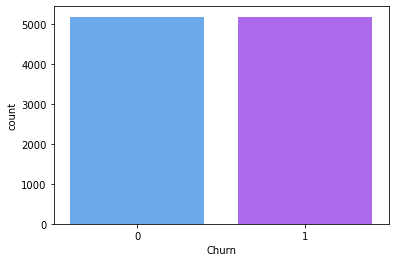

In [44]:
sns.countplot(y,palette='cool')
plt.show()

We see that the data is now Balanced

### Scaling the Data

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [46]:
x = sc.fit_transform(X)
x = pd.DataFrame(x,columns=X.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,-1.013451,-0.491830,1.155010,-0.584916,-1.431933,-3.052384,0.307316,-1.365397,-0.814984,1.275093,-0.961505,-0.826081,-1.092823,-1.105953,-0.709067,0.741371,0.362342,-1.312403
1,1.010679,-0.491830,-0.885578,-0.584916,0.502136,0.327613,-1.050994,-1.365397,1.477871,-0.946041,1.251536,-0.826081,-1.092823,-1.105953,1.088696,-1.377973,1.351420,-0.356037
2,1.010679,-0.491830,-0.885578,-0.584916,-1.283607,0.327613,-1.050994,-1.365397,1.477871,1.275093,-0.961505,-0.826081,-1.092823,-1.105953,-0.709067,0.741371,1.351420,-0.463399
3,1.010679,-0.491830,-0.885578,-0.584916,0.849913,-3.052384,0.307316,-1.365397,1.477871,-0.946041,1.251536,1.452829,-1.092823,-1.105953,1.088696,-1.377973,-1.704031,-0.867584
4,-1.013451,-0.491830,-0.885578,-0.584916,-1.283607,0.327613,-1.050994,0.313417,-0.814984,-0.946041,-0.961505,-0.826081,-1.092823,-1.105953,-0.709067,0.741371,0.362342,0.115395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,-1.013451,-0.491830,-0.885578,-0.584916,-1.431933,0.327613,-1.050994,1.519157,0.776400,0.453950,0.435793,0.746747,0.195907,0.176395,-0.709067,-1.377973,1.351420,-1.669033
10344,1.010679,2.043362,1.147298,-0.584916,-1.053187,0.327613,1.058908,0.313417,-0.814984,-0.946041,-0.961505,-0.826081,-1.092823,-1.105953,-0.709067,-1.377973,0.366080,0.259553
10345,0.592137,-0.491830,1.155010,1.733005,-0.257410,0.327613,-1.050994,0.313417,-0.814984,-0.946041,1.251536,-0.826081,1.102553,1.093176,-0.709067,-0.939743,1.146902,0.931520
10346,1.010679,2.043362,-0.885578,-0.584916,0.247335,0.327613,1.058908,0.313417,-0.814984,-0.946041,-0.961505,-0.826081,1.102553,1.093176,-0.709067,0.741371,0.362342,0.950890


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [48]:
max_accuracy = 0
max_random_state = 0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accuracy = accuracy_score(y_test,pred)
    if accuracy>max_accuracy:
        max_accuracy = accuracy
        max_random_state = i
print('The best accuracy is ', max_accuracy ,'for random_state', max_random_state)

The best accuracy is  0.7893719806763285 for random_state 74


In [69]:
lr = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=74)
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
accuracy = accuracy_score(y_test,pred)
print('Base Model Report :',lr)
print('Accuracy Score',accuracy)
print(classification_report(y_test,pred))

Base Model Report : LogisticRegression()
Accuracy Score 0.7893719806763285
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1570
           1       0.77      0.81      0.79      1535

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
for j in range(2,20):
    cv = cross_val_score(lr,x,y,cv=j)
    cv_score = cv.mean()
    print('at',j,'cross validation score is',cv_score,'and the accuracy is',accuracy)

at 2 cross validation score is 0.7725164282953227 and the accuracy is 0.7893719806763285
at 3 cross validation score is 0.7739670253787767 and the accuracy is 0.7893719806763285
at 4 cross validation score is 0.77425589485891 and the accuracy is 0.7893719806763285
at 5 cross validation score is 0.7737746303262095 and the accuracy is 0.7893719806763285
at 6 cross validation score is 0.7733882556015109 and the accuracy is 0.7893719806763285
at 7 cross validation score is 0.7736773492468239 and the accuracy is 0.7893719806763285
at 8 cross validation score is 0.7746450241521641 and the accuracy is 0.7893719806763285
at 9 cross validation score is 0.774064067473081 and the accuracy is 0.7893719806763285
at 10 cross validation score is 0.7735809529149029 and the accuracy is 0.7893719806763285
at 11 cross validation score is 0.7732933604934871 and the accuracy is 0.7893719806763285
at 12 cross validation score is 0.7739706584792523 and the accuracy is 0.7893719806763285
at 13 cross validatio

In [72]:
def Model(model):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=74)
    model.fit(x_test,y_test)
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,pred)*100
    cv = cross_val_score(model,x,y,cv=8)
    cv_score = cv.mean()*100
    print('Report for model', model)
    print('The Accuracy Score is', accuracy)
    print('Confussion Matrix :','\n',confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('Cross Validation Score is ', cv_score)
    print()
    print('Difference between accuracy score and cv is',accuracy-cv_score)

In [73]:
Model(lr)

Report for model LogisticRegression()
The Accuracy Score is 78.84057971014494
Confussion Matrix : 
 [[1193  377]
 [ 280 1255]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1570
           1       0.77      0.82      0.79      1535

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105

Cross Validation Score is  77.4645024152164

Difference between accuracy score and cv is 1.3760772949285354


In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
Model(knn)

Report for model KNeighborsClassifier()
The Accuracy Score is 83.73590982286635
Confussion Matrix : 
 [[1179  391]
 [ 114 1421]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1570
           1       0.78      0.93      0.85      1535

    accuracy                           0.84      3105
   macro avg       0.85      0.84      0.84      3105
weighted avg       0.85      0.84      0.84      3105

Cross Validation Score is  79.19446616007487

Difference between accuracy score and cv is 4.54144366279148


In [75]:
from sklearn.svm import SVC
svc = SVC()
Model(svc)

Report for model SVC()
The Accuracy Score is 84.70209339774557
Confussion Matrix : 
 [[1288  282]
 [ 193 1342]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1570
           1       0.83      0.87      0.85      1535

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105

Cross Validation Score is  81.21464735210759

Difference between accuracy score and cv is 3.4874460456379808


Report for model DecisionTreeClassifier()
The Accuracy Score is 99.90338164251207
Confussion Matrix : 
 [[1570    0]
 [   3 1532]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1570
           1       1.00      1.00      1.00      1535

    accuracy                           1.00      3105
   macro avg       1.00      1.00      1.00      3105
weighted avg       1.00      1.00      1.00      3105

Cross Validation Score is  78.39386166864499

Difference between accuracy score and cv is 21.509519973867086


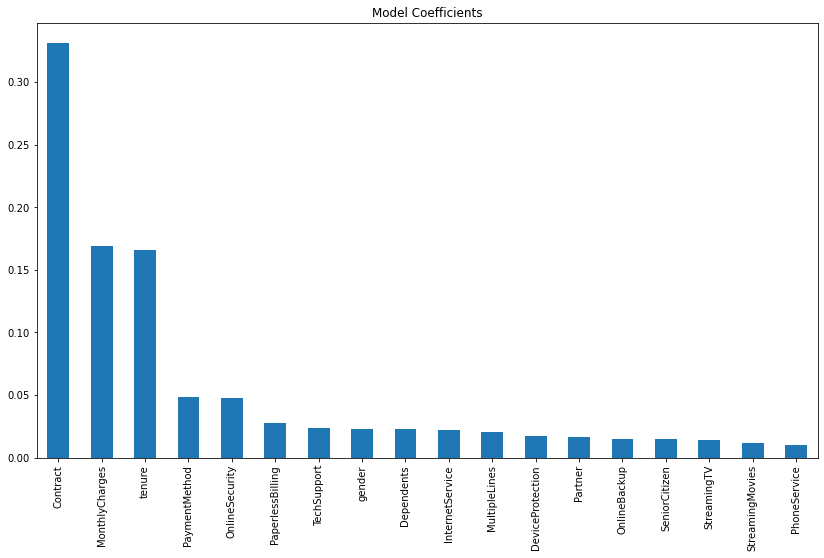

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
Model(dtc)
coef = pd.Series(dtc.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

Report for model RandomForestClassifier()
The Accuracy Score is 99.90338164251207
Confussion Matrix : 
 [[1567    3]
 [   0 1535]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1570
           1       1.00      1.00      1.00      1535

    accuracy                           1.00      3105
   macro avg       1.00      1.00      1.00      3105
weighted avg       1.00      1.00      1.00      3105

Cross Validation Score is  85.73834438439773

Difference between accuracy score and cv is 14.165037258114339


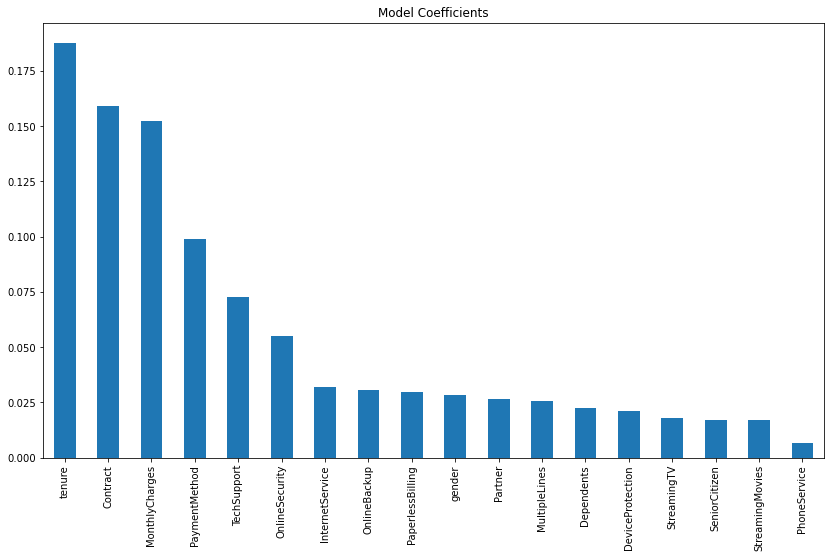

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
Model(rf)
coef = pd.Series(rf.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

Report for model ExtraTreesClassifier()
The Accuracy Score is 99.90338164251207
Confussion Matrix : 
 [[1570    0]
 [   3 1532]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1570
           1       1.00      1.00      1.00      1535

    accuracy                           1.00      3105
   macro avg       1.00      1.00      1.00      3105
weighted avg       1.00      1.00      1.00      3105

Cross Validation Score is  86.77200590266696

Difference between accuracy score and cv is 13.131375739845112


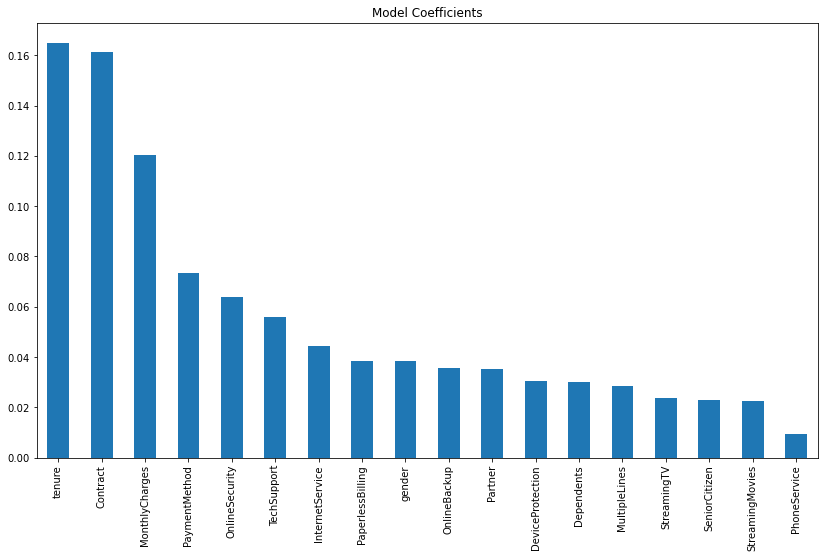

In [78]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
Model(et)
coef = pd.Series(et.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

Report for model AdaBoostClassifier()
The Accuracy Score is 83.15619967793882
Confussion Matrix : 
 [[1257  313]
 [ 210 1325]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1570
           1       0.81      0.86      0.84      1535

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105

Cross Validation Score is  81.08910510883116

Difference between accuracy score and cv is 2.0670945691076525


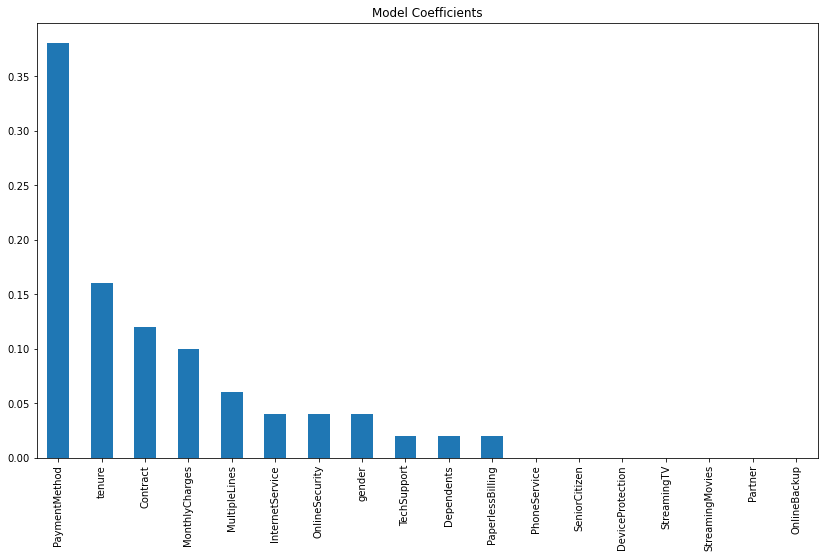

In [79]:
from sklearn.ensemble import AdaBoostClassifier
ad = AdaBoostClassifier()
Model(ad)
coef = pd.Series(ad.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

Report for model GradientBoostingClassifier()
The Accuracy Score is 86.85990338164251
Confussion Matrix : 
 [[1327  243]
 [ 165 1370]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1570
           1       0.85      0.89      0.87      1535

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105

Cross Validation Score is  83.64107768497833

Difference between accuracy score and cv is 3.218825696664183


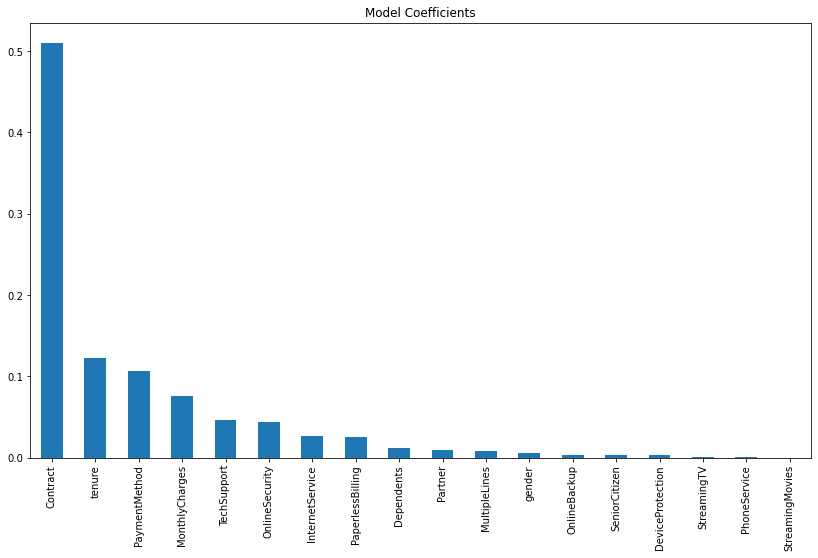

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
Model(gb)
coef = pd.Series(gb.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind= 'bar', title = 'Model Coefficients',figsize=(14,8))
plt.show()

2 best Models are LogisticRegression, AdaBoostClassifier

### HyperParameter Tuning

In [81]:
from sklearn.model_selection import GridSearchCV

In [83]:
ad = AdaBoostClassifier()
parameters = {
    'n_estimators': list(range(0,151,10)),
    'learning_rate': [0.0001,0.001,0.01,0.1,0.8,0.9,10],
    'algorithm': ['SAMME', 'SAMME.R']
}
gcv = GridSearchCV(ad,parameters,cv=8,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.9, 'n_estimators': 140}

In [84]:
gcv.best_estimator_

AdaBoostClassifier(learning_rate=0.9, n_estimators=140)

In [87]:
ad = AdaBoostClassifier(learning_rate=0.9, n_estimators=140)
Model(ad)

Report for model AdaBoostClassifier(learning_rate=0.9, n_estimators=140)
The Accuracy Score is 84.38003220611915
Confussion Matrix : 
 [[1288  282]
 [ 203 1332]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1570
           1       0.83      0.87      0.85      1535

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105

Cross Validation Score is  82.4423823560702

Difference between accuracy score and cv is 1.937649850048956


In [85]:
lr = LogisticRegression()

parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],'C':[0.001,0.0011,0.01,0.1,1,10],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gcv = GridSearchCV(lr,parameters,cv=8,n_jobs=-1)
gcv.fit(x_train,y_train)
gcv.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [86]:
gcv.best_estimator_

LogisticRegression(C=0.1, solver='newton-cg')

In [88]:
lr = LogisticRegression(C=0.1, solver='newton-cg')
Model(lr)

Report for model LogisticRegression(C=0.1, solver='newton-cg')
The Accuracy Score is 78.67954911433172
Confussion Matrix : 
 [[1187  383]
 [ 279 1256]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1570
           1       0.77      0.82      0.79      1535

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105

Cross Validation Score is  77.45482750418076

Difference between accuracy score and cv is 1.224721610150965


### Final Model : LogisticRegression with HyperParameter Tuning

In [89]:
lr = LogisticRegression(C=0.1, solver='newton-cg')
Model(lr)

Report for model LogisticRegression(C=0.1, solver='newton-cg')
The Accuracy Score is 78.67954911433172
Confussion Matrix : 
 [[1187  383]
 [ 279 1256]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1570
           1       0.77      0.82      0.79      1535

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105

Cross Validation Score is  77.45482750418076

Difference between accuracy score and cv is 1.224721610150965


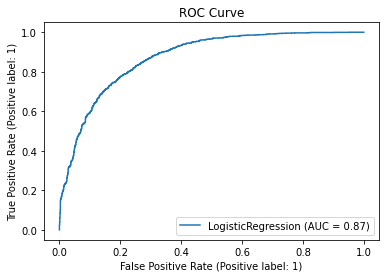

In [90]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr,x_test,y_test)
plt.title('ROC Curve')
plt.show()

### Saving The Best Model

In [91]:
import pickle

file_name = 'Customer_Churn_Analysis.pkl'
pickle.dump(lr,open(file_name,'wb'))